In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2
from model_equations import *

In [3]:
HCOLOR = '#CC9900'
PCOLOR = '#00CC33'
DOMCOLOR = '#006699'
DIMCOLOR = '#0099CC' #'#000066'

ccbpalette = [PCOLOR, HCOLOR, DOMCOLOR, DIMCOLOR]
ccborder = ['Bp', 'Bh', 'DOM', 'DIM']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hpalette = [ HCOLOR, DOMCOLOR, DIMCOLOR]
horder = [ 'Bh', 'DOM', 'DIM']
ppalette = [ PCOLOR, DOMCOLOR, DIMCOLOR]
porder = [ 'Bp', 'DOM', 'DIM']
sns.color_palette(ccbpalette)

In [4]:
import os
os.listdir()


['.ipynb_checkpoints',
 'debug.xlsx',
 'draft first model run - nmol per ml.ipynb',
 'first model run-Copy1.ipynb',
 'first model run.ipynb',
 'master model notebook.ipynb',
 'model diagram.pptx',
 'model notebook osnat try1.docx',
 'model notebook sep2021 simplified no quota.docx',
 'model notebook sep2021.docx',
 'model_equations.py',
 'model_equations_no_quota.py',
 'model_noquota_cc.ipynb',
 'model_quota_cc.ipynb',
 'model_quota_honly.ipynb',
 'model_quota_ponly.ipynb',
 'prelim bottle.csv',
 'recycle model results 041021.pptx',
 '__pycache__',
 '~$debug.xlsx',
 '~$del notebook sep2021.docx']

In [5]:
refdf = pd.read_csv('prelim bottle.csv')


In [6]:
for c in ['1A3', 'cc 1A3', 'cc mit9312', 'mit9312']:
    refdf[c] = refdf[c] *1e3
refdf.head()

,day,1A3,cc 1A3,cc mit9312,mit9312
0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09
1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09
2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09
3,6.853472,4.987215e+09,2.290707e+09,2.812842e+10,1.576008e+10
4,8.779167,2.867312e+09,1.598094e+09,6.262316e+10,4.113340e+10


In [7]:
print_params()

M_h  = 1.16e-06
M_p  = 1.16e-06
gamma^D_p  = 5.00e-01
gamma^D_h  = 5.00e-01
E^O_p  = 2.31e-06
E^I_p  = 0.00e+00
E^O_h  = 0.00e+00
E^I_h  = 2.31e-06
Qmax_p  = 1.50e-09
Qmin_p  = 7.00e-10
Qmax_h  = 3.14e-08
Qmin_h  = 1.47e-08
KO_p  = 1.10e-01
KI_p  = 1.10e-01
KO_h  = 2.50e-01
KI_h  = 2.50e-01
VmaxO_p  = 0.00e+00
VmaxI_p  = 2.20e-14
VmaxO_h  = 1.69e-13
VmaxI_h  = 1.69e-14
mu_inf_p  = 1.16e-05
mu_inf_h  = 1.74e-05
epsilon  = 1.16e-15
VTmax  = 2.20e-14
KT_h  = 2.50e-01
omega  = 1.00e+00


dBp/dt


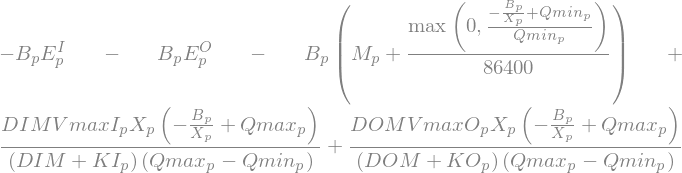

dBh/dt


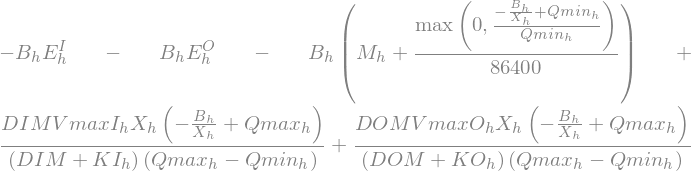

dXp/dt


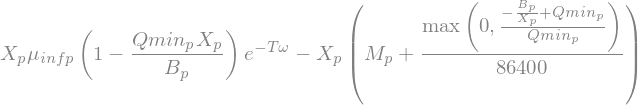

dXh/dt


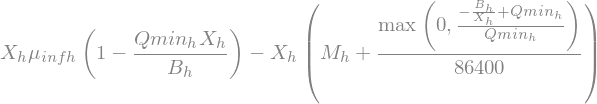

dDOM/dt


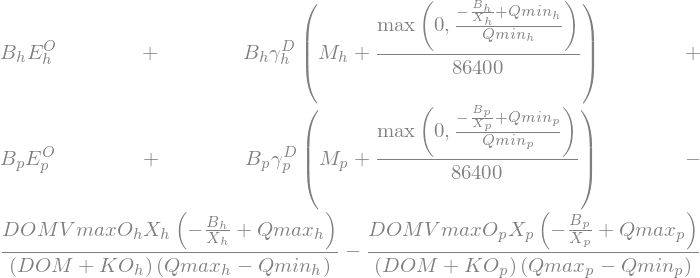

dDIM/dt


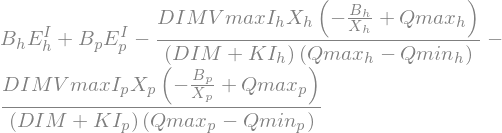

dT/dt


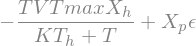

In [8]:
print_equations()


In [9]:
newparams = param_vals.copy()
newparams['omega'] = 0
var_names, init_vars, calc_dydt, interm_names, intermediate_func = \
   get_honly_data(param_vals=newparams)

In [10]:
print_dydt0(calc_dydt, var_names, init_vars)


dBh/dt = 3.15e-03, init Bh = 7.00e+00, newval = 7.00e+00
dXh/dt = -3.58e+06, init Xh = 1.00e+10, newval = 1.00e+10
dDOM/dt = -2.90e-03, init DOM = 5.00e+00, newval = 5.00e+00
dDIM/dt = -2.92e-04, init DIM = 1.00e+02, newval = 1.00e+02
dT/dt = -0.00e+00, init T = 0.00e+00, newval = 0.00e+00


In [11]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Qh   = 7.00e-10
Iuptakeh = 3.09e-04
Ouptakeh = 2.95e-03
muh  = -3.46e-04
Mstarh = 1.22e-05
growthh = -3.46e+06
deathh = 1.22e+05
exudationOh = 0.00e+00
exudationIh = 1.62e-05
Tbreakdownh = 0.00e+00


In [12]:
biomass_diff0_honly(calc_dydt, init_vars)


dBh/dt + dDOM/dt + dDIM/dt = -4.262578198722163e-05


In [13]:

for i,j in zip(interm_names, intermediate_func(*init_vars)):
    print(f'{i:<4} = {j:.2e}')

Qh   = 7.00e-10
Iuptakeh = 3.09e-04
Ouptakeh = 2.95e-03
muh  = -3.46e-04
Mstarh = 1.22e-05
growthh = -3.46e+06
deathh = 1.22e+05
exudationOh = 0.00e+00
exudationIh = 1.62e-05
Tbreakdownh = 0.00e+00


In [14]:
sol = run_solver(calc_dydt, init_vars)

solve_ivp(fun=calc_dydt, y0=[7.000006999999999, 10000000000.0, 5, 100, 0],
    t_span=[0, 5356800],
    t_eval=t_eval)
The solver successfully reached the end of the integration interval.


In [15]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [16]:
df.head()

,Bh,Xh,DOM,DIM,T,t,day,Qh,Iuptakeh,Ouptakeh,muh,Mstarh,growthh,deathh,exudationOh,exudationIh,Tbreakdownh
0,7.000007,1.000000e+10,5.000000,100.000000,0.0,0,0.000000,7.000007e-10,0.000309,0.002947,-0.000346,0.000012,-3.461982e+06,121787.826747,0.0,0.000016,0.0
1,12.554483,2.628993e+09,0.021360,98.532374,0.0,14400,0.166667,4.775396e-09,0.000070,0.000055,-0.000036,0.000009,-9.446279e+04,23558.344916,0.0,0.000029,0.0
2,12.182662,1.645260e+09,0.029222,98.193569,0.0,28800,0.333333,7.404704e-09,0.000040,0.000042,-0.000017,0.000007,-2.798228e+04,11327.544111,0.0,0.000028,0.0
3,11.733193,1.251436e+09,0.031694,98.117729,0.0,43200,0.500000,9.375785e-09,0.000028,0.000031,-0.000010,0.000005,-1.224205e+04,6668.466659,0.0,0.000027,0.0
4,11.308637,1.045061e+09,0.030871,98.150759,0.0,57600,0.666667,1.082103e-08,0.000022,0.000024,-0.000006,0.000004,-6.434596e+03,4376.228581,0.0,0.000026,0.0


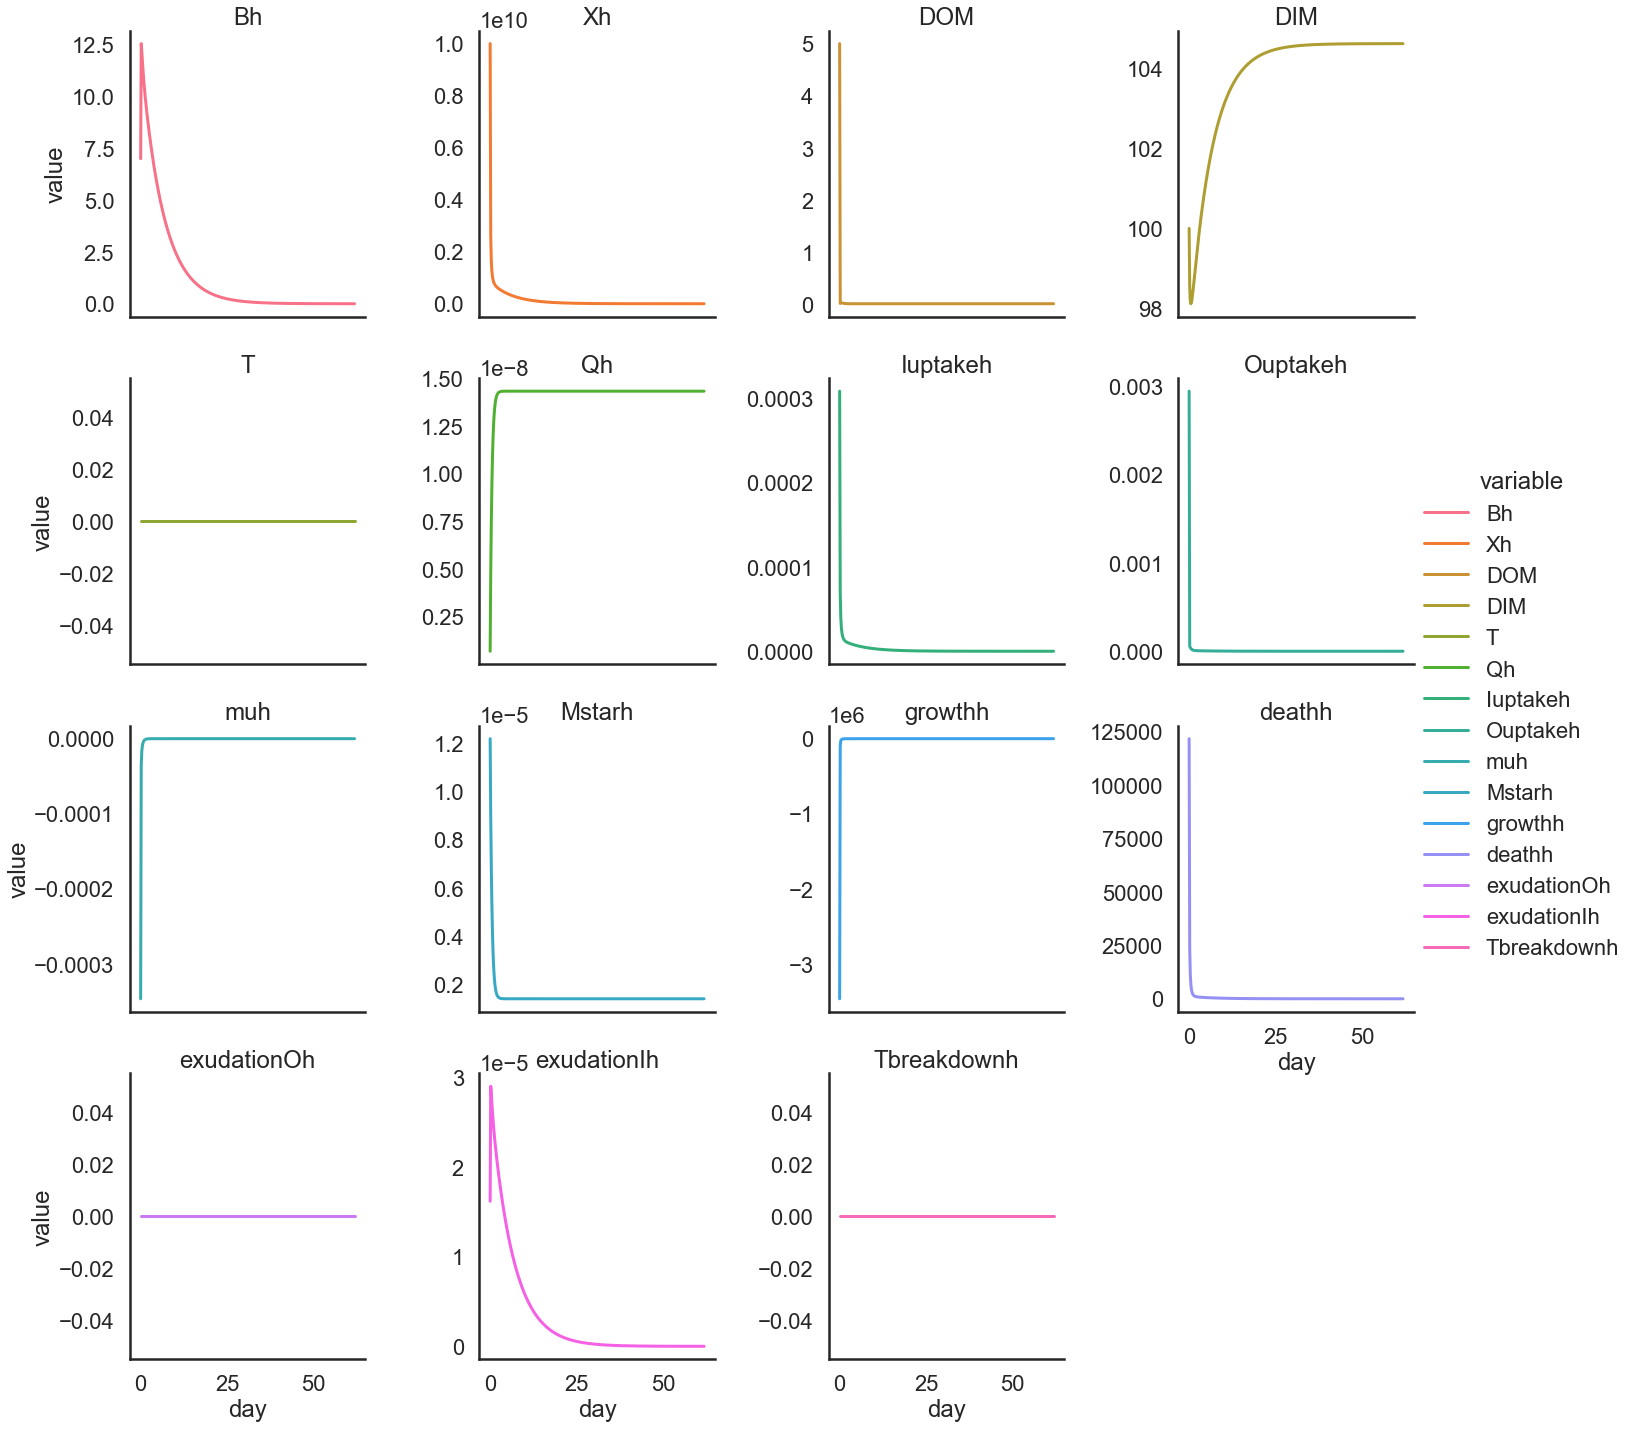

In [17]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=4, facet_kws=dict(sharey=False),
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [18]:
refdf.columns

Index(['day', '1A3', 'cc 1A3', 'cc mit9312', 'mit9312'], dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

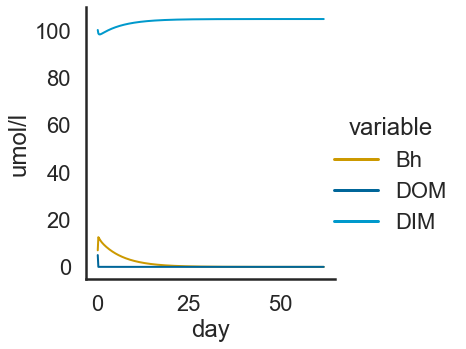

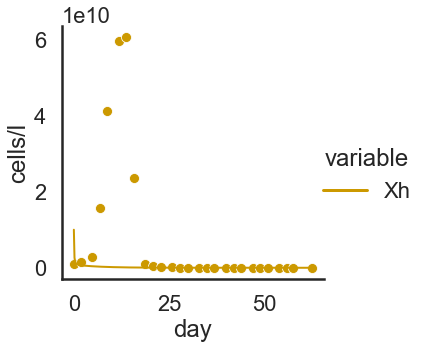

In [19]:
sns.relplot(data=mdf.loc[mdf.variable.isin(['Bh', 'DOM', 'DIM',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=hpalette, hue_order=horder,
           ).set(ylabel='umol/l')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xh',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=[HCOLOR], 
           ).set(ylabel='cells/l')
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False, color=HCOLOR)


<AxesSubplot:xlabel='day', ylabel='cells/l'>

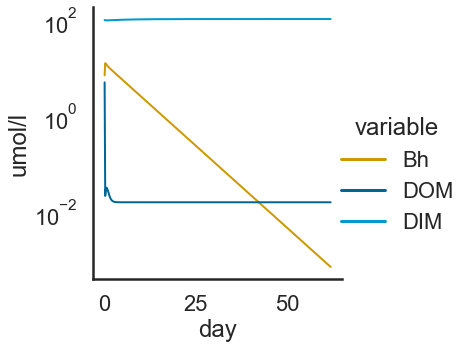

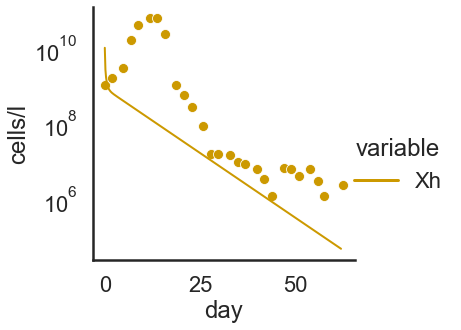

In [20]:
sns.relplot(data=mdf.loc[mdf.variable.isin(['Bh', 'DOM', 'DIM',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=hpalette, hue_order=horder,
           ).set(ylabel='umol/l', yscale='log')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=[HCOLOR], 
           ).set(ylabel='cells/l', yscale='log')
sns.scatterplot(data=refdf, x='day', y='mit9312', ax=g.ax, s=100, legend=False, color=HCOLOR)


In [21]:
df.min()

Bh             7.052961e-04
Xh             4.923747e+04
DOM            1.573107e-02
DIM            9.811773e+01
T              0.000000e+00
t              0.000000e+00
day            0.000000e+00
Qh             7.000007e-10
Iuptakeh       8.455687e-10
Ouptakeh       5.012537e-10
muh           -3.461982e-04
Mstarh         1.421399e-06
growthh       -3.461982e+06
deathh         6.998610e-02
exudationOh    0.000000e+00
exudationIh    1.632630e-09
Tbreakdownh    0.000000e+00
dtype: float64

In [22]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 321421
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([      0,   14400,   28800,   43200,   57600,   72000,   86400,
        100800,  115200,  129600,  144000,  158400,  172800,  187200,
        201600,  216000,  230400,  244800,  259200,  273600,  288000,
        302400,  316800,  331200,  345600,  360000,  374400,  388800,
        403200,  417600,  432000,  446400,  460800,  475200,  489600,
        504000,  518400,  532800,  547200,  561600,  576000,  590400,
        604800,  619200,  633600,  648000,  662400,  676800,  691200,
        705600,  720000,  734400,  748800,  763200,  777600,  792000,
        806400,  820800,  835200,  849600,  864000,  878400,  892800,
        907200,  921600,  936000,  950400,  964800,  979200,  993600,
       1008000, 1022400, 1036800, 1051200, 1065600, 1080000, 1094400,
       1108800, 1123200, 1137600, 1152000, 11664